# Jupyter Data Science Workflow

From Exploratory analysis to reproducible science

In [1]:
URL = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'

In [2]:
from urllib import urlretrieve

urlretrieve(URL, 'Fremont.csv')

('Fremont.csv', <httplib.HTTPMessage instance at 0x00000000042A4E48>)

In [3]:
import pandas as pd

Fremont=pd.read_csv('Fremont.csv', index_col='Date', parse_dates=True)

Fremont.head(10)

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2012-10-03 00:00:00,9.0,4.0
2012-10-03 01:00:00,6.0,4.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,3.0,2.0
2012-10-03 04:00:00,1.0,6.0
2012-10-03 05:00:00,10.0,21.0
2012-10-03 06:00:00,50.0,105.0
2012-10-03 07:00:00,95.0,257.0
2012-10-03 08:00:00,146.0,291.0


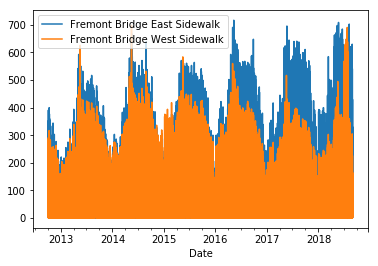

In [4]:
%matplotlib inline
Fremont.plot();

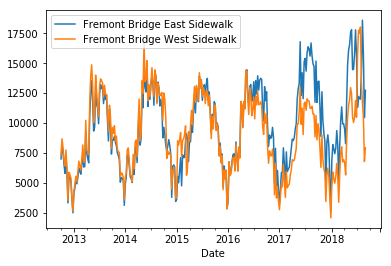

In [5]:
Fremont.resample('W').sum().plot(); #see the data weekly rather than hourly

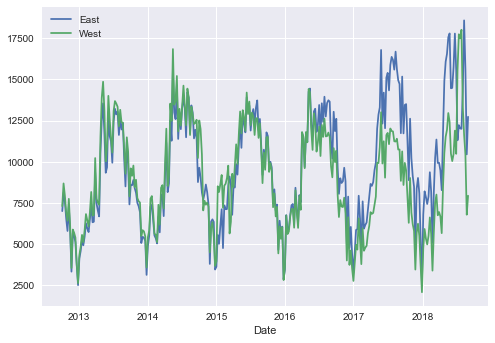

In [6]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
Fremont.columns = ['East', 'West']
Fremont.resample('W').sum().plot();

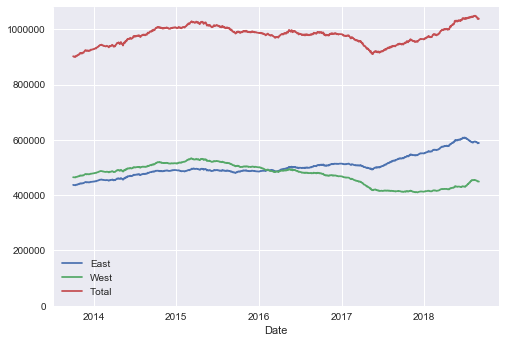

In [7]:
Fremont['Total'] = Fremont['West'] + Fremont['East']

ax = Fremont.resample('D').sum().rolling(365).sum().plot();
ax.set_ylim(0, None);

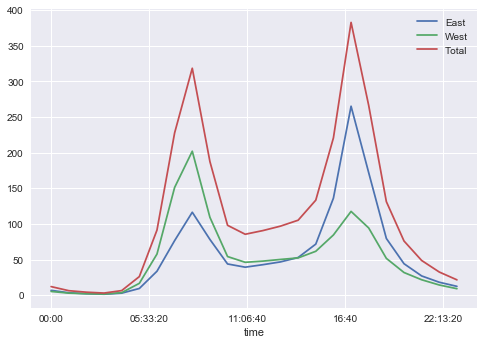

In [11]:
Fremont.groupby(Fremont.index.time).mean().plot();

In [13]:
pivoted = Fremont.pivot_table('Total', index=Fremont.index.time, columns=Fremont.index.date)
pivoted.iloc[:5, :5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


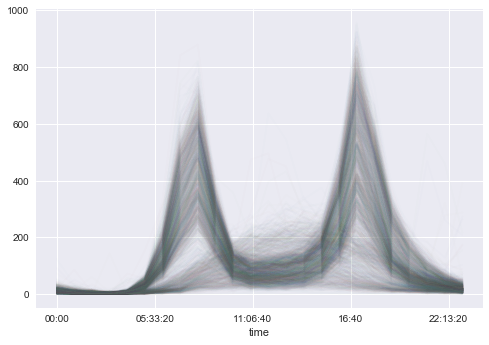

In [15]:
pivoted.plot(legend=False, alpha=0.01);